In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/fs/cbsuvlaminck2/workdir/bmg224/hiprfish/image_analysis_code')
from segmentation import Segmentation
from image import Image
import image_functions as imfn
from tqdm import tqdm

In [4]:
data_dir = '/fs/cbsuvlaminck2/workdir/bmg224/data/2021/devlaminck_widefield/2021_04_05_dnafishmethodchar'
factors = ['method', 'plasmid','fov']
flat_field_filename = '/fs/cbsuvlaminck2/workdir/bmg224/data/2021/devlaminck_widefield/2021_04_12_flat_field_correction_lens_100x_refl_cy5.czi'
flat_field_index = 0
sample_names = imfn.get_sample_names(data_dir=data_dir)
print(len(sample_names))
refl = ['gfp','cy5']

50


In [5]:
ims = [Image(sample_name=sn, data_dir=data_dir, illumination_names=refl, 
             flat_field_filename=flat_field_filename, 
             flat_field_index=flat_field_index) for sn in sample_names]
print(len(ims))

50


In [6]:
# Save grayscale images including zoom image
import pandas as pd
spot_channels=['cy5']
cmap='gray'
clims=(0.1, 0.4)
for im in tqdm(ims):
    im.pick_channel(illumination=spot_channels)
    im.flat_field_correction()
    im.save_intensity_image(image=im.raw_2D, fname_mod='_spot_raw', clims=clims, cmap=cmap)
    im.get_zoom_regions()
    zc = pd.read_csv(im.zoom_coords_filename).values[0][1:5].astype(list)
    im.save_intensity_image(image=im.raw_2D, fname_mod='_spot_raw_zoom', clims=clims,
                           zoom_coords = zc, cmap=cmap)

100%|██████████| 50/50 [02:12<00:00,  2.65s/it]


In [7]:
keys = [imfn.get_filename_keys(sn, filename_factors=factors) for sn in sample_names]
key_labels = [", ".join(k) for k in keys]
print(len(keys))

50


In [8]:
sn_dict = imfn.get_nested_dict(keys, sample_names, [0,1])
I = ['a','b','c','d','e','f','g']
J = ['neg','pos']
sn_sort = []
key_labels = []
for i in I:
    for j in J:
        for key, sn in sn_dict[i][j]:
            sn_sort.append(sn)
            key_labels.append(', '.join(key))

In [10]:
# Quick look with gallery
data_dir = '../../../../../data/2021/devlaminck_widefield/2021_04_05_dnafishmethodchar/'
filenames = [data_dir + '/' + sn + '_spot_raw.png' for sn in sn_sort]

## For image embedding via ipython, the filepath must be inreference to the current directory
imfn.gallery(filenames, captions=key_labels, row_height='350px')

In [6]:
im_keys =[im.get_filename_keys(factors) for im in ims]
print(len(im_keys))

62


In [7]:
from collections import defaultdict
def group(kv_pairs, k_index):
    list_dict = defaultdict(list) 
    for kv in kv_pairs:
        group = kv[0][k_index]
        list_dict[group].append(kv)
    return list_dict

im_zip = zip(im_keys, ims)
group_by = ['method', 'plasmid']
g_index = [factors.index(gb) for gb in group_by]
im_dict = group(im_zip, g_index[0])
for k, v in im_dict.items():
    im_dict[k] = group(v, g_index[1])
#     for k1, v1 in im_dict[k].items():
#         im_dict[k][k1] = group(v1, g_index[2])
#         for k2, v2 in im_dict[k][k1].items():
#             im_dict[k][k1][k2] = group(v2, g_index[3])
    
len(im_dict['e']['h'])

4

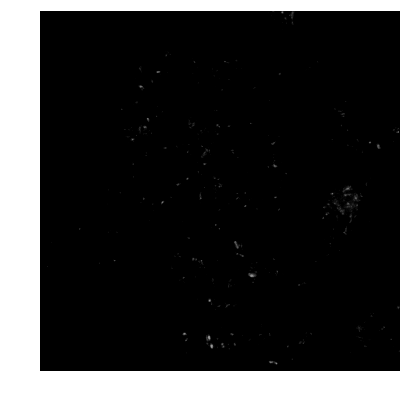

In [12]:
clims = [0.15,1.5]
dims = [5,5]
im = im_dict['e']['h'][1][1]
im.save_intensity_image(image=im.raw_2D, save=False, clims=clims, dims=dims, cmap='gray')

In [10]:
zc = pd.read_csv(im.zoom_coords_filename).iloc[0,1:].values.tolist()


In [ ]:
im.save_intensity_image(image=im.raw_2D, fname_mod='_spot_raw_zoom', save_ext='.png', 
                        save=True, clims=clims, dims=dims, zoom_coords=zc)

In [8]:
import numpy as np
# spot_seg_filename = im.basename + '_spot_seg.npy'
spot_seg = Segmentation(im.sample_name, refl, fname_mod='_cell_seg', 
                        flat_field_filename=flat_field_filename, 
                         flat_field_index=flat_field_index)
spot_seg.pick_channel('cy5')
spot_seg.flat_field_correction()
spot_seg.save_seg(zoom_coords=zc, fname_mod='_zoom', ext='.png', save=True, clims=clims)

NameError: name 'clims' is not defined

In [72]:
import numpy as np
clims = (0.15, 1.5)
# spot_seg_filename = im.basename + '_spot_seg.npy'
for method in ['e']:
    for plasmid in ['c','h']:
        tup_list = im_dict[method][plasmid]
        for key, im in tup_list:
            print(im.sample_name)
            zc = pd.read_csv(im.zoom_coords_filename).iloc[0,1:].values.tolist()
            spot_seg = Segmentation(im.sample_name, refl, fname_mod='_cell_seg', 
                                    flat_field_filename=flat_field_filename, 
                                     flat_field_index=flat_field_index)
            spot_seg.pick_channel('cy5')
            spot_seg.flat_field_correction()
            spot_seg.save_seg(fname_mod='_spot_raw_zoom', ext='.png', 
                              save=True, clims=clims)

2020_11_13_fullcharold_method_e_plasmid_c_fov_1
2020_11_13_fullcharold_method_e_plasmid_c_fov_5
2020_11_13_fullcharold_method_e_plasmid_c_fov_2
2020_11_13_fullcharold_method_e_plasmid_c_fov_3
2020_11_13_fullcharold_method_e_plasmid_c_fov_4
2020_11_13_fullcharold_method_e_plasmid_h_fov_1
2020_11_13_fullcharold_method_e_plasmid_h_fov_4
2020_11_13_fullcharold_method_e_plasmid_h_fov_3
2020_11_13_fullcharold_method_e_plasmid_h_fov_2


In [20]:
import numpy as np
clims = (0.01, 0.25)
cmap = 'gray'
dims = (0.5906, 0.5906)
ext = '.pdf'
# spot_seg_filename = im.basename + '_spot_seg.npy'
for method in ['a','b','c.1','h']:
    for plasmid in ['c','h']:
        tup_list = im_dict[method][plasmid]
        for key, im in tup_list:
            zc = pd.read_csv(im.zoom_coords_filename).iloc[0,1:].values.tolist()
            spot_seg = Segmentation(im.sample_name, refl, fname_mod='_cell_seg', 
                                    flat_field_filename=flat_field_filename, 
                                     flat_field_index=flat_field_index)
            spot_seg.pick_channel('cy5')
            spot_seg.flat_field_correction()
            spot_seg.save_seg(zoom_coords=zc, fname_mod='_spot_raw_zoom', ext=ext, 
                              save=True, clims=clims, cmap=cmap, dims=dims)

In [57]:
print(im.sample_name)

2020_11_13_fullcharold_method_h_plasmid_h_fov_5
